In [1]:
import pandas as pd
import sqlalchemy as sa

engine = sa.create_engine("mssql+pyodbc:///?odbc_connect= DRIVER={SQL Server};SERVER=mph-eprprddwh1\DWHPRD;Trusted_Connection=yes;")

with engine.connect() as conn:
   refs_df = pd.read_sql(open("S:\Data Science\sandboxes\Jawad\patient_LOS_project\patient_Los.sql").read(), con=conn.connection)

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_15100\1014790376.py:4: SyntaxWarning: invalid escape sequence '\D'
  engine = sa.create_engine("mssql+pyodbc:///?odbc_connect= DRIVER={SQL Server};SERVER=mph-eprprddwh1\DWHPRD;Trusted_Connection=yes;")
C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_15100\1014790376.py:7: SyntaxWarning: invalid escape sequence '\D'
  refs_df = pd.read_sql(open("S:\Data Science\sandboxes\Jawad\patient_LOS_project\patient_Los.sql").read(), con=conn.connection)
C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_15100\1014790376.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  refs_df = pd.read_sql(open

In [2]:
len(refs_df)

12906

In [3]:
df_emerg = refs_df.copy()

In [4]:
df_emerg = df_emerg.drop_duplicates()

In [5]:
refs_df.columns

Index(['admission_datetime', 'weekend', 'time_of_day', 'month', 'Los',
       'DischargeDestination', 'WardAdmission', 'acuity', 'AdmissionMethod',
       'SourceOfAdmission', 'DischargeDestination', 'EthnicCategory',
       'AgeOnAdmission', 'StartSexofPatientsCode', 'PrimaryDiagnosisICD',
       'Description', 'Chapter_Number', 'Chapter_Description', 'IMD_Decile'],
      dtype='object')

In [6]:
df_emerg.isna().sum()

admission_datetime          0
weekend                     0
time_of_day                 0
month                       0
Los                         0
DischargeDestination        0
WardAdmission               0
acuity                    361
AdmissionMethod             0
SourceOfAdmission           0
DischargeDestination        0
EthnicCategory            762
AgeOnAdmission              0
StartSexofPatientsCode      0
PrimaryDiagnosisICD         0
Description                 0
Chapter_Number              0
Chapter_Description         0
IMD_Decile                  0
dtype: int64

In [8]:
df_emerg = df_emerg.dropna().reset_index()

<Axes: xlabel='Los', ylabel='Count'>

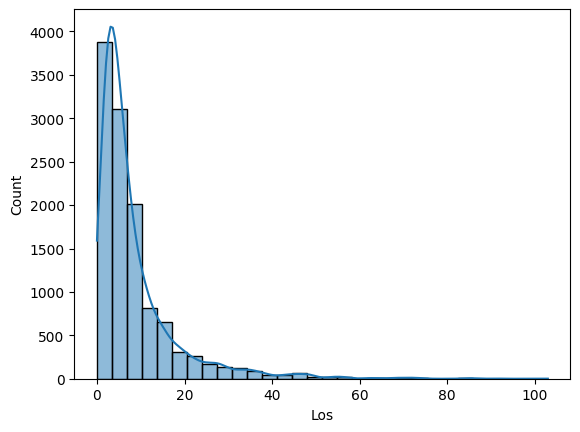

In [10]:
import seaborn as sns
sns.histplot(df_emerg['Los'], bins=30, kde=True)


In [15]:
# Define bins and labels
bins = [0, 1, 2, 5, 10, 20, 30, 40, 60, 80, float('inf')]
labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-30', '30-40', '40-60', '60-80', '>80']

# Apply binning
df_emerg['Los_Bin'] = pd.cut(df_emerg['Los'], bins=bins, labels=labels, right=False)

# Count patients per bin
bin_counts = df_emerg['Los_Bin'].value_counts().sort_index()

# Plot
import plotly.express as px

fig1 = px.bar(
    x=bin_counts.index,
    y=bin_counts.values,
    labels={'x': 'Length of Stay (Days)', 'y': 'Number of Patients'},
    title='Distribution of Length of Stay (LoS) Bins - Emergency Admissions'
)

fig1.show()


In [216]:

# Extract month from datetime
df['year_month'] = df['admission_datetime'].dt.to_period('M').dt.to_timestamp()
#df_short_los['month'] = df_short_los['admission_datetime'].dt.to_period('M').dt.to_timestamp()

# Group by month and calculate average LOS
monthly_avg_los = df.groupby('year_month')['Los'].mean().reset_index()
monthly_avg_los1 = df.groupby('year_month')['Los'].median().reset_index()

In [217]:
import pandas as pd
import plotly.graph_objects as go


# Create the plot
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=monthly_avg_los['year_month'],
        y=monthly_avg_los['Los'],
        mode='lines+markers',
        name='Average LOS mean',
        line=go.scatter.Line(shape='spline')
    )
)
fig.add_trace(
    go.Scatter(
        x=monthly_avg_los1['year_month'],
        y=monthly_avg_los1['Los'],
        mode='lines+markers',
        name='Average LOS median',
        line=go.scatter.Line(shape='spline')
    )
)


# Update layout
fig.update_layout(
    title='Average LOS Per Month (2020–2024) - Emergency',
    xaxis_title='Month',
    yaxis_title='Length of Stay (Days)',
    template='plotly_white',
    margin=dict(l=20, r=20, t=40, b=40),
    xaxis=dict(tickangle=50)
)

fig.show()


In [405]:
df[df['year_month'] == '2021-09-01'][df['Los'] == 72]

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_10096\1955233375.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,admission_datetime,weekend,time_of_day,month,Los,DischargeDestination,WardAdmission,acuity,AdmissionMethod,SourceOfAdmission,...,EthnicCategory,AgeOnAdmission,StartSexofPatientsCode,PrimaryDiagnosisICD,Description,Chapter_Number,Chapter_Description,IMD_Decile,year_month,year
3851,2021-09-04 02:21:24.387,0,Midnight,9,72,19,Surgical Assessment Unit,4.0,21,19,...,A,37,2,B376,Candidal endocarditis,1,Certain infectious and parasitic diseases,4.0,2021-09-01,2021
7128,2021-09-04 02:21:24.387,0,Midnight,9,72,19,Surgical Assessment Unit,2.0,21,19,...,A,37,2,B376,Candidal endocarditis,1,Certain infectious and parasitic diseases,4.0,2021-09-01,2021
7129,2021-09-04 02:21:24.387,0,Midnight,9,72,19,Surgical Assessment Unit,3.0,21,19,...,A,37,2,B376,Candidal endocarditis,1,Certain infectious and parasitic diseases,4.0,2021-09-01,2021


In [411]:
bins = [*range(0, 45, 5)]
df.query("year_month == '2021-09'")['Los'].plot.hist(alpha=0.5, bins=bins)

TypeError: dtype 'DischargeDestination    object
DischargeDestination    object
dtype: object' not understood

In [219]:
#df_short_los ['month'] = df_short_los['admission_datetime'].dt.month
monthly_avg_acuity = df.groupby(['month', 'acuity'])['Los'].mean().reset_index()

In [220]:
import plotly.graph_objects as go

methods = monthly_avg_acuity['acuity'].unique()

# Create a trace for each method
traces = [
    go.Scatter(
        x=monthly_avg_acuity[monthly_avg_acuity['acuity'] == method]['month'],
        y=monthly_avg_acuity[monthly_avg_acuity['acuity'] == method]['Los'],
        mode='lines+markers',
        name=str(method),
        line=go.scatter.Line(shape='spline')
    )
    for method in methods
]

# Assemble the figure
fig = go.Figure(data=traces)
fig.update_layout(
    title='Average LOS by Time of the Day Per Month',
    xaxis_title='Month',
    yaxis_title='Length of Stay (Days)',
    template='plotly_white',
    legend_title='Acuity',
    margin=dict(l=40, r=20, t=40, b=40)
)

fig.show()


In [364]:
df['day_of_week'] = df['admission_datetime'].dt.day_name()

In [371]:
df.groupby('day_of_week')['Los'].mean().reset_index()

,day_of_week,Los
0,Friday,8.413905
1,Monday,8.590807
2,Saturday,8.108666
3,Sunday,8.160772
4,Thursday,9.101252
5,Tuesday,8.286458
6,Wednesday,8.040840


In [372]:
df.groupby('month')['Los'].mean().reset_index()

,month,Los
0,1,8.817000
1,2,9.206818
2,3,8.575103
3,4,8.576837
4,5,8.678685
5,6,9.024313
6,7,8.188082
7,8,7.814556
8,9,8.633703
9,10,8.137051


In [366]:
#df_short_los ['month'] = df_short_los['admission_datetime'].dt.month
monthly_avg_day_of_week = df.groupby(['month', 'day_of_week'])['Los'].mean().reset_index()

In [368]:
monthly_avg_day_of_week

,month,day_of_week,Los
0,1,Friday,7.772152
1,1,Monday,9.646259
2,1,Saturday,6.695312
3,1,Sunday,9.533333
4,1,Thursday,9.586466
...,...,...,...
79,12,Saturday,7.085938
80,12,Sunday,7.526316
81,12,Thursday,8.505747
82,12,Tuesday,6.615385


In [367]:
import plotly.graph_objects as go

methods = monthly_avg_day_of_week['day_of_week'].unique()

# Create a trace for each method
traces = [
    go.Scatter(
        x=monthly_avg_day_of_week[monthly_avg_day_of_week['day_of_week'] == method]['month'],
        y=monthly_avg_day_of_week[monthly_avg_day_of_week['day_of_week'] == method]['Los'],
        mode='lines+markers',
        name=str(method),
        line=go.scatter.Line(shape='spline')
    )
    for method in methods
]

# Assemble the figure
fig = go.Figure(data=traces)
fig.update_layout(
    title='Average LOS by Time of the Day Per Month',
    xaxis_title='Month',
    yaxis_title='Length of Stay (Days)',
    template='plotly_white',
    legend_title='Acuity',
    margin=dict(l=40, r=20, t=40, b=40)
)

fig.show()


In [222]:
df_short_los = df.copy()

In [223]:
len(df_short_los)

11794

In [226]:
df_short_los.head(5)

,admission_datetime,weekend,time_of_day,month,Los,DischargeDestination,WardAdmission,acuity,AdmissionMethod,SourceOfAdmission,DischargeDestination,EthnicCategory,AgeOnAdmission,StartSexofPatientsCode,PrimaryDiagnosisICD,Description,Chapter_Number,Chapter_Description,IMD_Decile,year_month
0,2020-01-02 12:22:08.880,0,2,1,6,19,Acute Medical Unit,3.0,21,19,19,A,84,2,I214,Acute subendocardial myocardial infarction,9,Diseases of the circulatory system,10.0,2020-01-01
1,2020-01-02 17:49:34.623,0,2,1,11,19,Acute Medical Unit,4.0,21,19,19,A,87,1,I442,"Atrioventricular block, complete",9,Diseases of the circulatory system,9.0,2020-01-01
3,2020-01-03 15:35:10.653,0,2,1,5,19,Coronary Care Unit,2.0,2D,19,19,A,82,1,I210,Acute transmural myocardial infarction of ante...,9,Diseases of the circulatory system,6.0,2020-01-01
4,2020-01-03 15:50:15.917,0,2,1,5,19,Acute Medical Unit,4.0,21,19,19,A,75,1,I210,Acute transmural myocardial infarction of ante...,9,Diseases of the circulatory system,10.0,2020-01-01
5,2020-01-03 17:12:53.537,0,2,1,3,19,Coronary Care Unit,2.0,2D,19,19,A,69,1,I210,Acute transmural myocardial infarction of ante...,9,Diseases of the circulatory system,5.0,2020-01-01


In [225]:
df_short_los['time_of_day'] = df_short_los['time_of_day'].map({'Morning':1, 'Afternoon':2, 'Evening':3, 'Midnight':4})

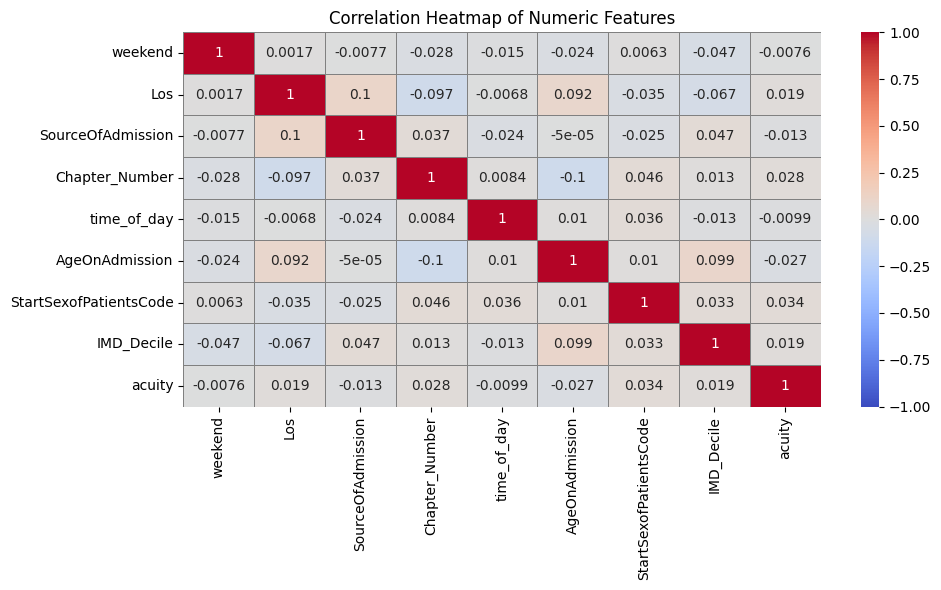

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features
numeric_features = [
    'weekend', 'Los', 'SourceOfAdmission', 'Chapter_Number', 'time_of_day',
    'AgeOnAdmission', 'StartSexofPatientsCode', 'IMD_Decile', 'acuity'
]

# Compute correlation matrix
correlation_matrix = df_short_los[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


In [174]:
import pandas as pd

# Group by 'WardAdmission' and calculate the mean of 'Los'
mean_los = df_short_los.groupby('WardAdmission')['Los'].mean().reset_index(name='Mean_Los')

# Count the number of entries for each 'WardAdmission'
entry_counts = df_short_los['WardAdmission'].value_counts().reset_index()
entry_counts.columns = ['WardAdmission', 'Total_Entries']

# Merge the two DataFrames on 'WardAdmission'
summary_df = pd.merge(mean_los, entry_counts, on='WardAdmission')

# Display the resulting DataFrame
print(summary_df)


                   WardAdmission   Mean_Los  Total_Entries
0                 AMU-Barrington   8.888430           1936
1             Acute Medical Unit   9.870953           2255
2      Ambulatory Emergency Care   9.116788            137
3                Barrington Ward  26.325000             40
4                     Blake Ward  17.250000              8
5   Cardiac Catheter Laboratory    2.866667            195
6            Coleridge Resp Unit  17.000000              1
7             Conservators Ward   17.000000              2
8            Coronary Care Unit    5.295090           2057
9           Dunkery Stroke Neuro   9.111111              9
10                 Dunkery Ward   23.000000              1
11                  Exmoor Ward   15.200000              5
12                Fielding Ward    9.470588            204
13              Hestercombe Ward  21.000000              2
14          High Dependency Unit  18.700000             10
15        Intensive Therapy Unit  10.735294             

In [413]:
df_short_los[df_short_los['WardAdmission'] == 'Surgical Assessment Unit'][df_short_los['Los']>25]

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_22996\178927852.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,weekend,time_of_day,month,Los,WardAdmission,acuity,AdmissionMethod,SourceOfAdmission,AgeOnAdmission,StartSexofPatientsCode,PrimaryDiagnosisICD,Chapter_Number,IMD_Decile
173,0,4,2,28,Surgical Assessment Unit,3.0,21,19,81,1,I330,9,5.0
299,0,4,2,28,Surgical Assessment Unit,2.0,21,19,81,1,I330,9,5.0
426,0,4,2,28,Surgical Assessment Unit,4.0,21,19,81,1,I330,9,5.0
1758,0,3,11,42,Surgical Assessment Unit,2.0,21,19,86,1,I330,9,4.0
2810,0,3,10,29,Surgical Assessment Unit,3.0,24,51,63,2,E877,4,2.0
3061,0,3,6,57,Surgical Assessment Unit,2.0,21,19,82,2,S3250,19,9.0
3098,0,2,7,34,Surgical Assessment Unit,3.0,22,19,61,1,N12X,14,2.0
3343,0,3,11,42,Surgical Assessment Unit,3.0,21,19,86,1,I330,9,4.0
3405,0,4,9,72,Surgical Assessment Unit,2.0,21,19,37,2,B376,1,4.0
3406,0,4,9,72,Surgical Assessment Unit,4.0,21,19,37,2,B376,1,4.0


In [227]:
df_short_los =  df_short_los.drop(columns=['admission_datetime', 'EthnicCategory','Description', 'Chapter_Description', 'DischargeDestination'])

In [229]:
df_short_los = df_short_los.drop(columns=['year_month'])

In [234]:
df_short_los['time_of_day'].value_counts()

time_of_day
2    4251
3    3486
4    2072
1    1985
Name: count, dtype: int64

In [235]:
len(df_short_los)

11794

In [268]:
df_short_los.head(2)

,weekend,time_of_day,month,Los,WardAdmission,acuity,AdmissionMethod,SourceOfAdmission,AgeOnAdmission,StartSexofPatientsCode,PrimaryDiagnosisICD,Chapter_Number,IMD_Decile
0,0,2,1,6,Acute Medical Unit,3.0,21,19,84,2,I214,9,10.0
1,0,2,1,11,Acute Medical Unit,4.0,21,19,87,1,I442,9,9.0


Linear Regression Model:

In [420]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define features and target
X = df_short_los.drop(columns='Los')
y = df_short_los['Los']


# Define categorical and numerical columns
categorical_cols = ['weekend',  'time_of_day', 'month', 'acuity', 'AdmissionMethod', 'SourceOfAdmission', 'StartSexofPatientsCode', 'Chapter_Number', 'IMD_Decile']
high_cardinality_cols = ['PrimaryDiagnosisICD', 'WardAdmission']
numerical_cols = ['AgeOnAdmission']

# Target encoding for high-cardinality categorical features
for col in high_cardinality_cols:
    X[col] = df_short_los.groupby(col)['Los'].transform('mean')

# One-hot encoding for low-cardinality categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical and target-encoded columns
)

# Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predict on training data
y_train_pred = pipeline.predict(X_train)

# Evaluate on training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Predict on testing data
y_test_pred = pipeline.predict(X_test)

# Evaluate on testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Output results
print("Linear Regression Model Performance:")
print("\nTraining Set:")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R² Score: {train_r2:.2f}")

print("\nTesting Set:")
print(f"MAE: {test_mae:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R² Score: {test_r2:.2f}")



Linear Regression Model Performance:

Training Set:
MAE: 4.51
RMSE: 7.15
R² Score: 0.44

Testing Set:
MAE: 4.76
RMSE: 7.98
R² Score: 0.36


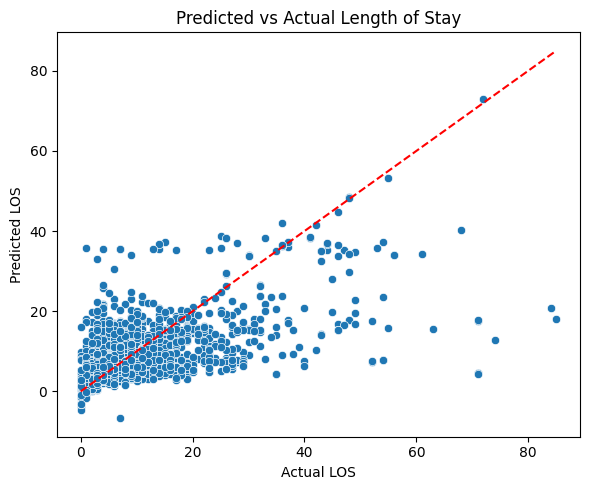

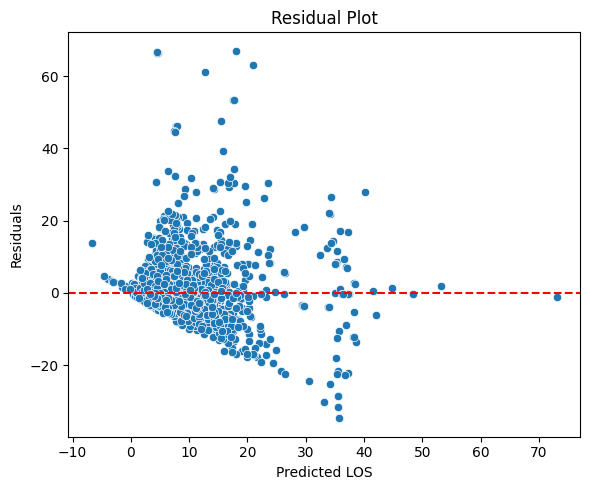

In [422]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_test_pred

# Plot 1: Predicted vs Actual
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Actual LOS")
plt.ylabel("Predicted LOS")
plt.title("Predicted vs Actual Length of Stay")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.tight_layout()
plt.show()

# Plot 2: Residual Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted LOS")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()


XGBoosting Regression:

In [423]:
df_short_los_20 = df_short_los[df_short_los['Los'] <= 20]

In [424]:
# Import necessary libraries
import optuna
import numpy as np

from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Define feature groups
num_cols = ['AgeOnAdmission'] #Numerical values
low_card_cols = ['SourceOfAdmission','IMD_Decile','month','weekend','StartSexofPatientsCode','time_of_day', 'acuity', 'Chapter_Number'] 
target_enc_cols  = ['PrimaryDiagnosisICD','WardAdmission', 'AdmissionMethod' ] #Categorical values

# Define preprocessing pipelines for each feature group
num_pipe = Pipeline([
    ('scaler', StandardScaler())  # Scale numerical features
])

low_card_pipe = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode low-cardinality categorical features
])


target_enc_pipe = Pipeline([
    ('target_enc', TargetEncoder())  # Target encode high-cardinality categorical features
])


# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('low_ohe', low_card_pipe, low_card_cols),
    ('target_enc', target_enc_pipe, target_enc_cols)
])

# Split data into training and test sets
target_col = 'Los'
X = df_short_los_20.drop(columns=[target_col])
y = df_short_los_20[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [425]:
# Define Optuna objective function for hyperparameter tuning
def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1500),
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'random_state': 50,
        'n_jobs': -1,
        'eval_metric': 'rmse'
    }

    # Initialize XGBoost model
    xgb = XGBRegressor(**params)

    # Create pipeline with preprocessing and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', xgb)
    ])

    # Apply log transformation to target variable
    regressor = TransformedTargetRegressor(
        regressor=pipeline,
        func=np.log1p,
        inverse_func=np.expm1
    )

    # Perform 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=50)
    scores = cross_validate(regressor, X_train, y_train, cv=kf, scoring=['neg_mean_squared_error'], return_train_score=False)

    # Return mean MSE
    mean_mse = -np.mean(scores['test_neg_mean_squared_error'])

    return mean_mse

# Run Optuna study to find best hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

print("Best trial params:", study.best_trial.params)

[I 2025-08-18 09:50:50,387] A new study created in memory with name: no-name-370e7931-87b4-4a4a-88f9-7054cfd4acce


[I 2025-08-18 09:51:23,718] Trial 0 finished with value: 8.30514211654663 and parameters: {'n_estimators': 515, 'max_depth': 17, 'learning_rate': 0.07223846480106257, 'subsample': 0.9370471935836087, 'colsample_bytree': 0.9395980367345445, 'reg_alpha': 0.049736892639683505, 'reg_lambda': 0.37880017212301836}. Best is trial 0 with value: 8.30514211654663.
[I 2025-08-18 09:53:28,842] Trial 1 finished with value: 8.69550666809082 and parameters: {'n_estimators': 1228, 'max_depth': 15, 'learning_rate': 0.010647278156467552, 'subsample': 0.7633926532401061, 'colsample_bytree': 0.5655113186937833, 'reg_alpha': 0.011030983828895516, 'reg_lambda': 0.5705753067650281}. Best is trial 0 with value: 8.30514211654663.
[I 2025-08-18 09:54:11,474] Trial 2 finished with value: 9.119119834899902 and parameters: {'n_estimators': 907, 'max_depth': 12, 'learning_rate': 0.1029674811413957, 'subsample': 0.7349277874346988, 'colsample_bytree': 0.6567447377279019, 'reg_alpha': 0.03499428842994903, 'reg_lambda

Best trial params: {'n_estimators': 517, 'max_depth': 20, 'learning_rate': 0.050650116086807674, 'subsample': 0.9166652350003646, 'colsample_bytree': 0.862894482542645, 'reg_alpha': 0.046222311772099206, 'reg_lambda': 0.0015483480094901055}


In [428]:
# Train final model using best hyperparameters
best_params = study.best_trial.params
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(**best_params))
])

# Apply log transformation to target during training
regressor = TransformedTargetRegressor(
    regressor=final_model,
    func=np.log1p,
    inverse_func=np.expm1
)

# Fit model and make predictions
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)


In [430]:
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"Final Train MAE: {mae_train:.3f}, RMSE: {rmse_train:.3f}, R² Score: {r2_train:.4f}")

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Final Test MAE: {mae:.3f}, RMSE: {rmse:.3f}, R² Score: {r2:.4f}")

Final Train MAE: 0.034, RMSE: 0.209, R² Score: 0.9978
Final Test MAE: 1.282, RMSE: 2.575, R² Score: 0.7031


In [347]:
import optuna.visualization as vis

vis.plot_optimization_history(study).show()
vis.plot_param_importances(study).show()


C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_10096\1464632316.py:21: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



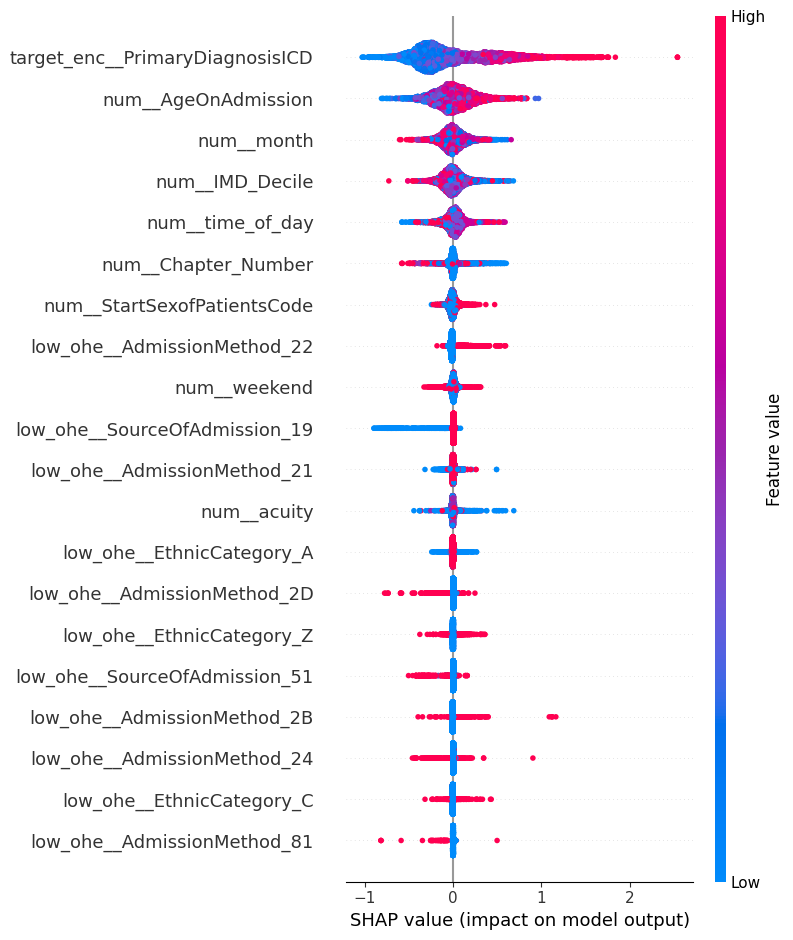

In [377]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Extract model from your pipeline
trained_xgb_model = final_model.named_steps['model']

# Transform the training data using the fitted preprocessor
X_train_transformed = preprocessor.transform(X_train)

# Fit the XGBoost model directly on the transformed data with log-transformed target
trained_xgb_model.fit(X_train_transformed, np.log1p(y_train))

# Create SHAP explainer
explainer = shap.Explainer(trained_xgb_model)

# Compute SHAP values
shap_values = explainer(X_train_transformed)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_train_transformed, feature_names=preprocessor.get_feature_names_out())


In [ ]:
Result:
All Los = Final Test MAE: 2.995, RMSE: 50.477, R² Score: 0.7027
Los <= 80 = Final Test MAE: 2.971, RMSE: 41.825, R² Score: 0.6744
Los <= 50 = Final Test MAE: 2.592, RMSE: 27.030, R² Score: 0.7083
Los <= 20 = Final Test MAE: 1.429, RMSE: 7.614, R² Score: 0.6707
Los <= 10 = Final Test MAE: 0.894, RMSE: 2.528, R² Score: 0.6514

In [242]:
import pandas as pd
import sqlalchemy as sa

engine = sa.create_engine("mssql+pyodbc:///?odbc_connect= DRIVER={SQL Server};SERVER=mph-eprprddwh1\DWHPRD;Trusted_Connection=yes;")

with engine.connect() as conn:
   test_df = pd.read_sql(open("S:\Data Science\sandboxes\Jawad\patient_LOS_project\emerg_test_Los.sql").read(), con=conn.connection)

<>:4: SyntaxWarning:

invalid escape sequence '\D'

<>:7: SyntaxWarning:

invalid escape sequence '\D'

<>:4: SyntaxWarning:

invalid escape sequence '\D'

<>:7: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_22996\1680106589.py:4: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_22996\1680106589.py:7: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_22996\1680106589.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [243]:
test_df=test_df.drop_duplicates()

In [244]:
test_df = test_df.dropna()

In [245]:
len(test_df)

489

In [311]:
test_df.head(5)

,weekend,time_of_day,month,Los,WardAdmission,acuity,AdmissionMethod,SourceOfAdmission,AgeOnAdmission,StartSexofPatientsCode,PrimaryDiagnosisICD,Chapter_Number,IMD_Decile
0,0,4,1,5,AMU-Barrington,1.0,21,19,56,1,I214,9,8.0
1,0,2,6,4,AMU-Barrington,3.0,21,19,75,1,I251,9,2.0
2,0,2,6,4,AMU-Barrington,2.0,21,19,75,1,I251,9,2.0
3,1,2,1,2,Coronary Care Unit,4.0,21,19,75,1,I214,9,5.0
4,0,2,1,0,Coronary Care Unit,2.0,21,19,78,1,I251,9,5.0


In [352]:
test_df_20 = test_df[test_df['Los']<=20]

In [353]:
batch_predictions = regressor.predict(test_df_20)

In [354]:
t_r2 = r2_score(test_df_20['Los'], batch_predictions)
t_mae = mean_absolute_error(test_df_20['Los'], batch_predictions)
t_rmse = np.sqrt(mean_squared_error(test_df_20['Los'], batch_predictions))

print(f"Unseen Test MAE: {t_mae:.3f}, RMSE: {t_rmse:.3f}, R² Score: {t_r2:.4f}")

Unseen Test MAE: 3.175, RMSE: 4.421, R² Score: 0.0505


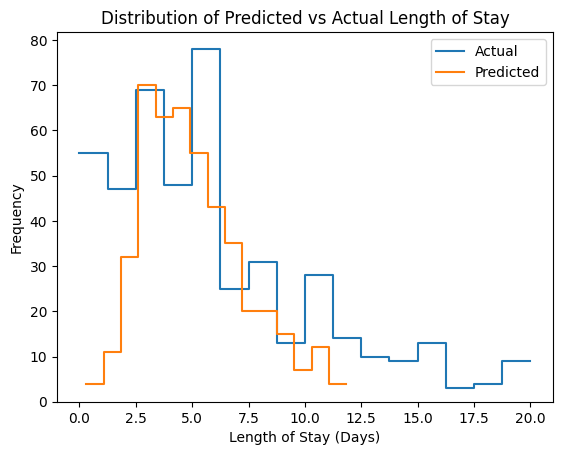

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot actual values
sns.histplot(test_df_20['Los'], bins='auto', fill=False, element="step", label='Actual')

# Plot predicted values
sns.histplot(batch_predictions, bins='auto', fill=False, element="step", label='Predicted')


# Add axis labels and legend
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs Actual Length of Stay')
plt.legend()

# Show the plot
plt.show()


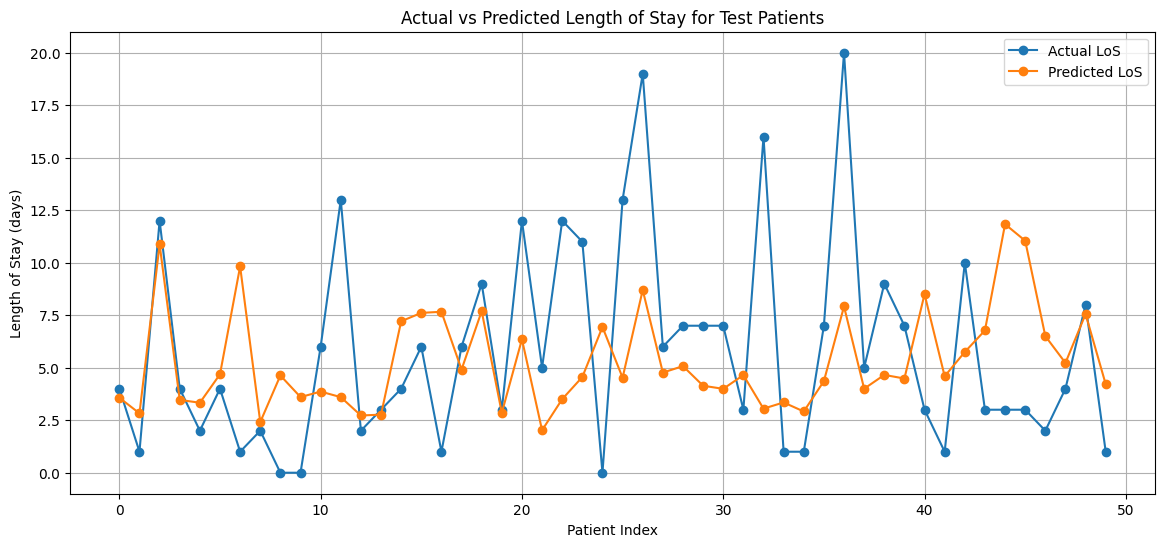

In [356]:

import matplotlib.pyplot as plt
import numpy as np

# Convert to numpy arrays for indexing
y_test_array = np.array(test_df_20['Los'][50:100])
y_pred_array = np.array(batch_predictions[50:100])

# Create an index for each patient
indices = np.arange(len(y_test_array))

# Plot actual vs predicted as line plot
plt.figure(figsize=(14, 6))
plt.plot(indices, y_test_array, label='Actual LoS', marker='o')
plt.plot(indices, y_pred_array, label='Predicted LoS', marker='o')
plt.xlabel('Patient Index')
plt.ylabel('Length of Stay (days)')
plt.title('Actual vs Predicted Length of Stay for Test Patients')
plt.legend()
plt.grid(True)


In [252]:
test_df[24:27]

,weekend,time_of_day,month,Los,WardAdmission,acuity,AdmissionMethod,SourceOfAdmission,AgeOnAdmission,StartSexofPatientsCode,PrimaryDiagnosisICD,Chapter_Number,IMD_Decile
24,1,2,1,8,AMU-Barrington,3.0,21,19,76,2,J440,10,1.0
25,0,4,1,55,AMU-Barrington,2.0,21,19,70,1,T826,19,5.0
26,0,2,1,20,Montacute Ward,3.0,21,19,40,1,J150,10,7.0


In [83]:
len(df_short_los[df_short_los['PrimaryDiagnosisICD'].str.strip().str.upper() == 'I214'])


1761

RandomForestRegresssion

In [418]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint


# Define features and target
X = df_short_los.drop(columns='Los')
y = df_short_los['Los']

# Categorical and numerical features
categorical_cols = ['AdmissionMethod', 'SourceOfAdmission', 'WardAdmission', 'month', 'weekend', 'StartSexofPatientsCode', 'time_of_day', 'acuity', 'IMD_Decile', 'Chapter_Number', ]
numerical_cols = ['AgeOnAdmission']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)],
    remainder='passthrough'  # Keep numerical columns as is
)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_dist = {
    'regressor__n_estimators': randint(100, 500),
    'regressor__max_depth': randint(5, 30),
    'regressor__min_samples_split': randint(2, 10),
    'regressor__min_samples_leaf': randint(1, 10),
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Randomized Search CV
search = RandomizedSearchCV(pipeline, param_distributions=param_dist,
                            n_iter=20, cv=5, scoring='neg_mean_squared_error',
                            verbose=1, random_state=42, n_jobs=-1)

# Fit the model
search.fit(X_train, y_train)

# Best model
best_model = search.best_estimator_

print("Best Parameters:", search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\pipeline.py", line 663, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\pipeline.py", line 663, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_forest.py", line 359, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 2971, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1368, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'I209  '

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\pipeline.py", line 663, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_forest.py", line 359, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 2971, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1368, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'I501  '

--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\pipeline.py", line 663, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\jawad.iqbal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


In [ ]:

# Predict and evaluate
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

mae_2 = mean_absolute_error(y_test, y_pred)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_2= r2_score(y_test, y_pred)
